In [2]:
import pandas as pd
TweetData=pd.read_csv('twitter_sentiment_data.csv')
TweetData.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [3]:
from copy import deepcopy
eda = deepcopy(TweetData)
sentiment_num2name = {
    -1: "Anti",
     0: "Neutral",
     1: "Pro",
     2: "News",
}
eda["sentiment"] = eda["sentiment"].apply(lambda num: sentiment_num2name[num])
eda.head()

,sentiment,message,tweetid
0,Anti,@tiniebeany climate change is an interesting h...,792927353886371840
1,Pro,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,Pro,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,Pro,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,News,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [4]:
from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns

([<matplotlib.patches.Wedge at 0x125e1bd00>,
 [Text(-1.196992544097065, -0.08490494317786287, 'Anti'),
  Text(0.8648225142943446, -0.831914670365662, 'Neutral'),
  Text(1.0812025035296828, 0.5205777044410819, 'Pro'),
  Text(0.33768237700868936, 1.1515079731629139, 'News')],
 [Text(-0.6982456507232878, -0.04952788352042, '52%'),
  Text(0.5044798000050343, -0.4852835577133028, '21%'),
  Text(0.630701460392315, 0.30367032759063106, '18%'),
  Text(0.19698138658840209, 0.6717129843450329, '9%')])

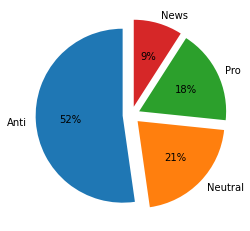

In [7]:
labels = list(sentiment_num2name.values())
plt.pie(eda["sentiment"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

In [10]:
import re
def cleaner(tweet):
    tweet = tweet.lower()
    
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        tweet = re.sub(key, "", tweet)
    
    # strip punctuation and special characters
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
    # strip excess white-space
    tweet = re.sub(r"\s\s+", " ", tweet)
    
    return tweet.lstrip(" ")

In [11]:
eda["message"] = eda["message"].apply(cleaner)
eda.head()

,sentiment,message,tweetid
0,Anti,climate change is an interesting hustle as it ...,792927353886371840
1,Pro,rt watch right here as travels the world to ta...,793124211518832641
2,Pro,fabulous leonardo s film on change is brillian...,793124402388832256
3,Pro,rt just watched this amazing documentary by le...,793124635873275904
4,News,rt pranita biswasi a lutheran from odisha give...,793125156185137153


In [15]:
import re
import nltk
import itertools
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet

In [13]:
def lemmatizer(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["lemmatized"] = df["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    df["lemmatized"] = df["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [16]:
eda = lemmatizer(eda)
eda.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,lemmatized
0,Anti,climate change is an interesting hustle as it ...,792927353886371840,122,"[climate, change, is, an, interesting, hustle,...","[(climate, n), (change, n), (is, v), (an, n), ...",climate change be an interesting hustle a it b...
1,Pro,rt watch right here as travels the world to ta...,793124211518832641,76,"[rt, watch, right, here, as, travels, the, wor...","[(rt, n), (watch, n), (right, r), (here, r), (...",rt watch right here a travel the world to tack...
2,Pro,fabulous leonardo s film on change is brillian...,793124402388832256,61,"[fabulous, leonardo, s, film, on, change, is, ...","[(fabulous, a), (leonardo, n), (s, n), (film, ...",fabulous leonardo s film on change be brillian...
3,Pro,rt just watched this amazing documentary by le...,793124635873275904,104,"[rt, just, watched, this, amazing, documentary...","[(rt, n), (just, r), (watched, v), (this, n), ...",rt just watch this amazing documentary by leon...
4,News,rt pranita biswasi a lutheran from odisha give...,793125156185137153,125,"[rt, pranita, biswasi, a, lutheran, from, odis...","[(rt, n), (pranita, n), (biswasi, v), (a, n), ...",rt pranita biswasi a lutheran from odisha give...


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
from IPython.display import (
    Markdown as md,
    Latex,
    HTML,
)
from tqdm.auto import tqdm

In [22]:
frequency = {}

sentimentGroup = eda.groupby("sentiment")
for sentiment, group in tqdm(sentimentGroup):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["lemmatized"])
    
    words = words.sum(axis=0)
    word_freq = [(word, words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=10)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view)

  0%|          | 0/4 [00:00<?, ?it/s]

Anti        Neutral             News            Pro       
      word  freq     word  freq       word  freq     word   freq
0  climate  2368  climate  4579     change  8172   change  19350
1   change  2285   change  4572    climate  8077  climate  19234
2       rt  2069       rt  3493         rt  5076       rt  14666
3   global  1964   global  3231      trump  2003   global   4286
4  warming  1497  warming  2600     global  1411  warming   3141
5     warm   406     warm   572        say   947    trump   2245
6     make   254      say   519    warming   912  believe   2151
7      amp   228    trump   469        new   573      amp   1692
8      say   224      amp   353  scientist   556    think   1620
9      man   222     like   329        epa   545    doesn   1303

  0%|          | 0/4 [00:00<?, ?it/s]

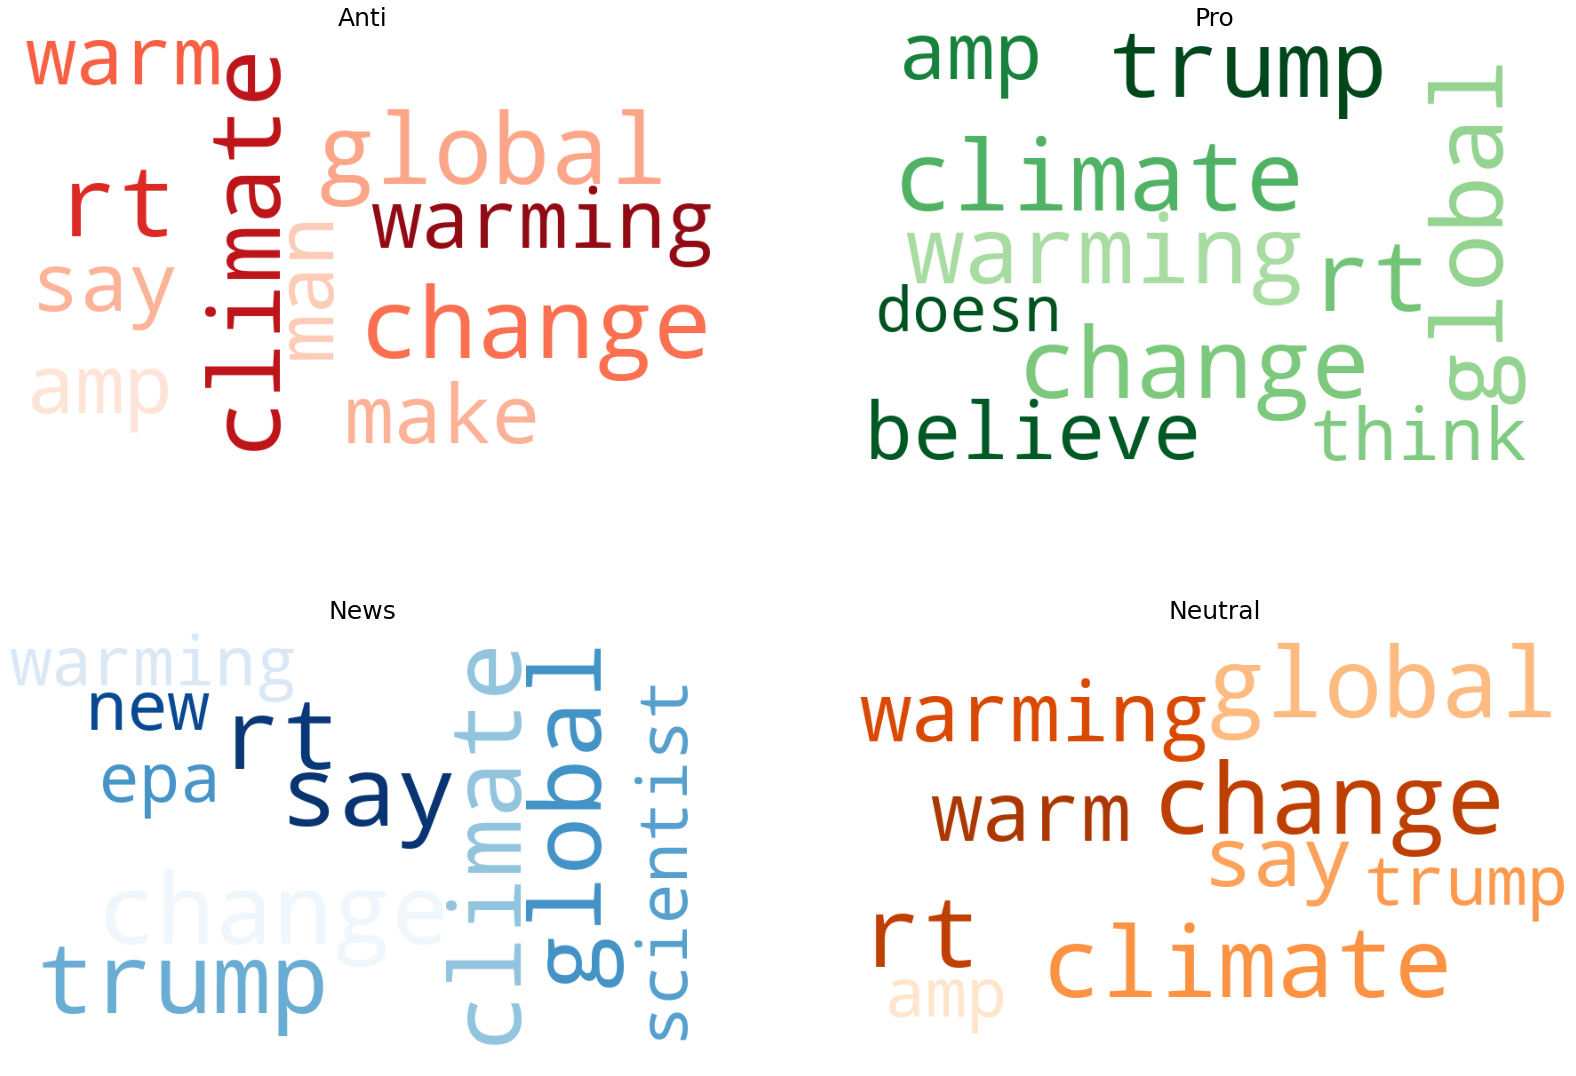

In [23]:
words = {sentiment: " ".join(frequency[sentiment]["word"].values) for sentiment in sentiment_num2name.values()}

cmaps = {
    "Anti": ("Reds", 110),
    "Pro" : ("Greens", 73),
    "News": ("Blues", 0),
    "Neutral": ("Oranges", 10),
}

from wordcloud import WordCloud

wordclouds = {}
for sentiment, (cmap, rand) in tqdm(cmaps.items()):
    wordclouds[sentiment] = WordCloud(
        width=800, height=500, random_state=rand,
        max_font_size=110, background_color="white",
        colormap=cmap
    ).generate(words[sentiment])
    
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter // 2, counter % 2].imshow(wordcloud)
    axes[counter // 2, counter % 2].set_title(sentiment, fontsize=25)
    counter += 1
    
for ax in fig.axes:
    plt.sca(ax)
    plt.axis("off")

plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import LinearSVC

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [27]:
X = TweetData["message"]
y = TweetData["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2000)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=2000)

In [28]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

<24717x48847 sparse matrix of type '<class 'numpy.float64'>'
	with 430346 stored elements in Compressed Sparse Row format>

In [29]:
svm_model = LinearSVC(class_weight="balanced")

In [32]:
svm_model.fit(tfidf.transform(X_train), y_train)
preds = svm_model.predict(tfidf.transform(X_valid))

In [33]:
cm = confusion_matrix(y_valid, preds)
cm_normd = cm / cm.sum(axis=1).reshape(-1, 1)

[]

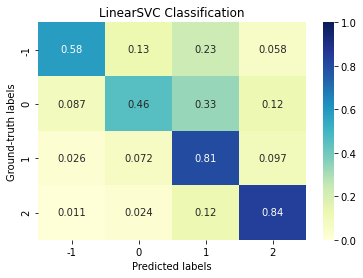

In [35]:
heatmap_kwargs = dict(
        cmap="YlGnBu",
        xticklabels=svm_model.classes_,
        yticklabels=svm_model.classes_,
        vmin=0.,
        vmax=1.,
        annot=True,
        annot_kws={"size": 10},
    )
    
sns.heatmap(cm_normd, **heatmap_kwargs)
    
plt.title(f"{svm_model.__class__.__name__} Classification")
plt.ylabel("Ground-truth labels")
plt.xlabel("Predicted labels")
plt.plot()

In [36]:
print(metrics.classification_report(y_valid, preds))

              precision    recall  f1-score   support

          -1       0.64      0.58      0.61       757
           0       0.59      0.46      0.51      1403
           1       0.80      0.81      0.80      4349
           2       0.70      0.84      0.76      1731

    accuracy                           0.73      8240
   macro avg       0.68      0.67      0.67      8240
weighted avg       0.73      0.73      0.73      8240

